주제 : 홀덤(Hold'em)

- 홀덤이란?  
> 플레잉 카드로 즐기는 가장 대표적인 '커뮤니티 카드 포커' 게임이며,  
> 패 2장과 공유카드 5장으로 족보를 맞춰서, 높은 쪽이 승리하는 게임이다.

<img src='./images/1.jpg' width='500'>

데이터 분석에 앞서, 간단하게 룰을 설명하자면 다음과 같다.

<img src='./images/2.jpg' width='500'>

1. 앞의 두장의 카드가 플레이어가 받는 카드, 그리고 위의 5장의 카드가 놓이는 곳을 커뮤니티(공용카드)라고 부른다.
2. 버튼은 한 게임당 플레이어 앉은 순서대로 돌아간다.
3. 버튼위치를 기준으로 Small Blind(이하 SB), Big Blind(이하 BB)가 정해진다.
4. 7장을 손에 쥐고, 그 7장중에 가장 높은 조합을 가진 플레이어가 이기는 포커와 달리,  
   홀덤은 커뮤니티 5장과 포켓(손에 쥔 카드)2장을 포함하여 총 5장의 카드중에서
   가장 높은 카드 조합을 가진 플레이어가 승리한다.
6. 더 자세하게 설명할 수 있지만, 어떤 데이터를 분석했는지에 대해 간략한 이해를 위해 여기까지만 간단히 언급한다.
   
- [Game-Start]
1. SB는 게임이 시작하기전, 최소 테이블 베팅을 한다. (Ex - 0.5, 게임 테이블의 최소 판돈에 따라 다름)
2. BB는 게임이 시작하기전, SB의 2배에 해당하는 베팅을 한다. (Ex - 1)
3. 나머지 플레이어들은 테이블 베팅을 하지 않는다.
4. SB와 BB만 게임 시작전 베팅을 하는 이유는 빠른 게임의 순환을 위해서이다.


- [Pre-Flop]
1. SB와 BB의 베팅이 마무리되면 딜러는 BB 다음위치의 플레이어부터 카드를 1장씩 총 2장이 되도록 나눠준다.
2. 패를 확인한 후, BB의 다음위치인 UTG(Under The Gun)부터 Action을 한다.  
    a. Action에는 Bet, Raise, Fold, Check, Call, All-in이 있다.  
    b. Bet - 테이블 첫 베팅을 Bet이라고 칭한다. Bet의 종류로는 Half(테이블 칩의 반), Quater(테이블 칩의 1/4) 등등이 있다.  
    c. Raise - Bet Action 이후에, 테이블 칩을 올리는 행위를 Raise라고 칭한다.  
    d. Fold - 더 이상 게임에 참여하지않고 카드를 덮는 행위를 의미한다.  
    e. Check - 첫 베팅시에 테이블 칩을 더 올리지 않고 다음 플레이어에게 Action을 넘긴다.  
    f. Call - 앞선 플레이어의 Bet이나 Raise가 있는 경우, 더 칩을 넣지 않고 그 Bet이나 Raise 칩을 그대로 따라가는 행동이다.  
    g. All-in - 홀덤에는 게임을 주최하는 측마다 다르지만, 대체적으로 테이블 칩의 상한선이 없다. 말그대로 내 칩을 다 테이블에 넣는 행동이다.
3. 모든 플레이어의 Action이 끝나면 딜러는 Flop단계로 넘어간다.

- [Flop]
1. 딜러는 덱에서 카드 3장을 커뮤니티에 오픈한다.
2. SB부터 Action을 시작한다.
3. 만일 SB가 Fold한 상태라면, SB의 기준으로 다음 Fold안한 플레이어부터 Action을 시작한다.
4. 모든 플레이어의 Action이 끝나면 Turn단계로 넘어간다.

- [Turn]
1. 딜러는 덱에서 카드 1장을 커뮤니티에 오픈한다. (커뮤니티 카드 총 4장)
2. SB부터 Action을 시작한다.
3. 만일 SB가 Fold한 상태라면, SB의 기준으로 다음 Fold안한 플레이어부터 Action을 시작한다.
4. 모든 플레이어의 Action이 끝나면 River단계로 넘어간다.

- [River]
1. 딜러는 덱에서 카드 1장을 커뮤니티에 오픈한다. (커뮤니티 카드 총 5장)
2. SB부터 Action을 시작하고, 모든 플레이어의 Action이 종료되면 남아있는 모든 플레이어는  
   카드를 오픈하고 승패를 결정하는 Show-Down 과정이 진행된다.
3. Show-Down과정에서 가장 좋은 족보를 가진 사람이 2명이상이라면 테이블칩을 그 해당 플레이어 수 만큼 나눠서 가진다.


분석방향
1. Pre-Flop단계에서 2장의 패와 승률
2. Player의 Action과 승률
3. Player의 SeedMoney와 승률
4. Player의 위치(SmallBlind)에 따른 승률

In [1]:
import pandas as pd
import numpy as np



In [2]:
hg_df = pd.read_csv('./datasets/holdem_play1.csv')
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
1,0,2,0,0,PANDAisEVIL,101.00,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
2,0,3,0,0,AironVega,103.20,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
3,0,4,0,0,IlxxxlI,43.00,9d 7d,0,1,0,0,0,NaN,NaN,NaN,NaN,0
4,0,5,0,0,pineapplesand,40.00,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52154,5,0,0,IlxxxlI,53.33,2d 5h,0,1,0,0,0,NaN,NaN,NaN,NaN,0
306332,52155,1,0,0,superman51210,43.77,NaN,0,1,0,0,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,0
306333,52155,3,0,0,IampokerKidd,63.72,NaN,1,0,2,1,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,1
306334,52155,4,0,1,Milkin,53.51,NaN,0,1,1,0,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,0


분석 방향

1. 포켓(손에 쥔) 패가 높은 패일 수록 게임을 이겼는가?
2. SeedMoney가 게임의 승리에 영향을 미쳤는가?
3. SmallBlind일 때 얼마나 이겼는가?

비고) 홀덤게임은 심리적인 요인이 50%이상을 차지하는 게임이지만, 데이터 분석을 위해 심리적인 요인은 제외하고 분석함.

In [3]:
hg_df_player = hg_df.groupby('PlayerName')['Win'].sum().reset_index()
hg_df_player

,PlayerName,Win
0,!MushroomMan!,12
1,....,14
2,00MOD,3
3,01001111,3
4,0nlyDaNuts,35
...,...,...
2393,zimsaw55,1
2394,zionnoiz,48
2395,zitkojosh,16
2396,zqzqzq,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

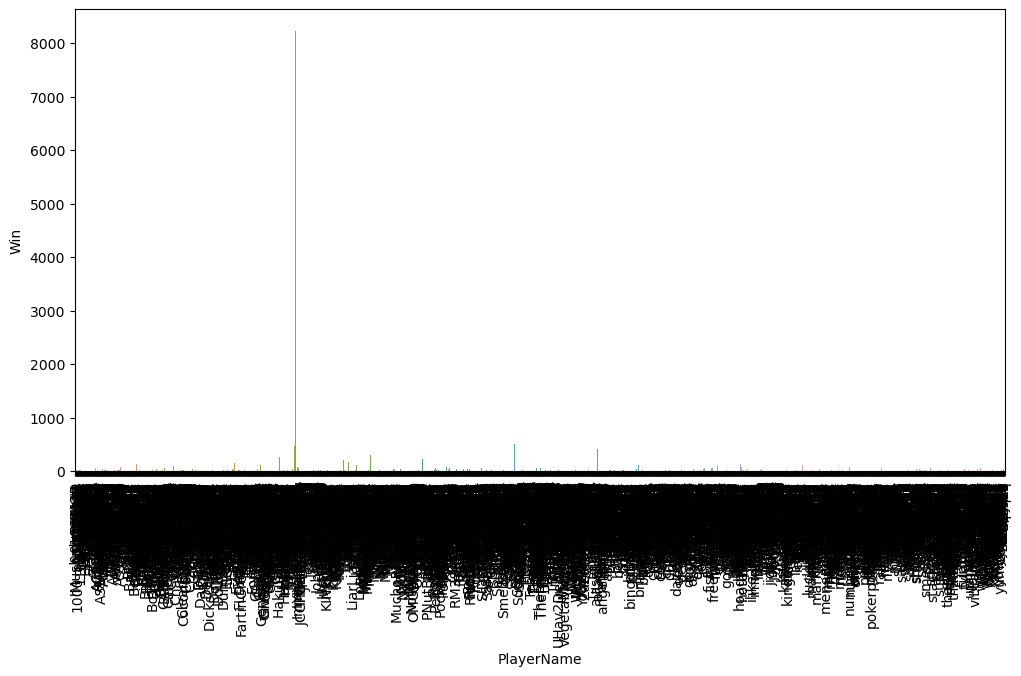

In [5]:
plt.figure(figsize=(12,6))

sns.barplot(x='PlayerName', y='Win',data=hg_df_player)
plt.xticks(rotation=90)
plt.show()

In [6]:
hg_df_player.Win.sort_values(ascending=False)

569     8216
93       673
1285     654
1266     653
25       540
        ... 
1553       0
1256       0
1257       0
1555       0
343        0
Name: Win, Length: 2398, dtype: int64

In [7]:
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
1,0,2,0,0,PANDAisEVIL,101.00,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
2,0,3,0,0,AironVega,103.20,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
3,0,4,0,0,IlxxxlI,43.00,9d 7d,0,1,0,0,0,NaN,NaN,NaN,NaN,0
4,0,5,0,0,pineapplesand,40.00,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52154,5,0,0,IlxxxlI,53.33,2d 5h,0,1,0,0,0,NaN,NaN,NaN,NaN,0
306332,52155,1,0,0,superman51210,43.77,NaN,0,1,0,0,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,0
306333,52155,3,0,0,IampokerKidd,63.72,NaN,1,0,2,1,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,1
306334,52155,4,0,1,Milkin,53.51,NaN,0,1,1,0,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,0


In [8]:
hg_df_player

,PlayerName,Win
0,!MushroomMan!,12
1,....,14
2,00MOD,3
3,01001111,3
4,0nlyDaNuts,35
...,...,...
2393,zimsaw55,1
2394,zionnoiz,48
2395,zitkojosh,16
2396,zqzqzq,0


전체 이긴 회수와 그 승률을 구한다. 이떄, 한 게임 당 여러명의 승자가 있을 수 있기에   
TotalWin의 합계가 아닌 GameNo의 마지막 수로 나누어 주었다.

In [9]:
total_game = 52156

hg_df_player['Win Rate'] = hg_df_player['Win'] / total_game * 100
hg_df_player.rename(columns={'Win':'TotalWin'}, inplace=True)
hg_df_player

,PlayerName,TotalWin,Win Rate
0,!MushroomMan!,12,0.023008
1,....,14,0.026843
2,00MOD,3,0.005752
3,01001111,3,0.005752
4,0nlyDaNuts,35,0.067106
...,...,...,...
2393,zimsaw55,1,0.001917
2394,zionnoiz,48,0.092032
2395,zitkojosh,16,0.030677
2396,zqzqzq,0,0.000000


In [10]:
hg_df = hg_df.merge(hg_df_player, on='PlayerName')
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52123,5,0,1,GiveMeHeads,51.05,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669
306332,52124,5,0,0,GiveMeHeads,51.55,NaN,2,0,0,1,0,5h 2c 6c,NaN,NaN,5h 2c 6c,1,4,0.007669
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669
306334,52134,5,0,1,GiveMeHeads,57.38,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669


먼저 포켓 패의 공개가 된것만 추출

In [11]:
hg_df_showcard = hg_df[~hg_df.PlayerCard.isna()]
hg_df_showcard

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087
36,144,1,0,0,StephCurry,100.00,4c 4s,0,0,1,1,3,5d 7s 6c,Js,2c,5d 7s 6c Js 2c,1,132,0.253087
48,184,3,0,0,StephCurry,110.85,8s 6s,1,0,1,0,0,5h Jh 7c,3h,10s,5h Jh 7c 3h 10s,1,132,0.253087
216,39366,1,0,0,StephCurry,214.15,Qs Qh,1,0,2,0,0,3s Qc 7c,9d,As,3s Qc 7c 9d As,1,132,0.253087
242,39422,1,0,0,StephCurry,212.76,As Qd,1,0,1,1,0,9d 8s 10d,10s,2d,9d 8s 10d 10s 2d,0,132,0.253087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306265,51956,2,0,0,mabext99,23.30,5c 3c,0,0,0,5,1,5s 10c 10d,8d,2h,5s 10c 10d 8d 2h,0,1,0.001917
306270,51973,2,0,0,mabext99,7.48,4h 4c,0,0,0,1,0,Qd 9h 9s,Ks,Ac,Qd 9h 9s Ks Ac,0,1,0.001917
306276,51973,5,0,1,gsxrmike,14.20,5s 5d,2,0,1,0,0,Qd 9h 9s,Ks,Ac,Qd 9h 9s Ks Ac,0,0,0.000000
306311,52125,4,0,0,superman51210,43.17,Ks Ac,1,0,0,2,2,Qs Jc As,2c,6s,Qs Jc As 2c 6s,1,6,0.011504


위 사람들이 어떤 핸드를 가지고 플레이했는지 확인하기 위해 핸드 조합을 계산해서 나타냄.

In [12]:
total_count = 52*51/2
total_count

1326.0

핸드의 종류
1. 포켓 페어(AA, KK, QQ, JJ...)
2. 수딧(AKs, AJs, K9s,...) - 모양이 같은 카드
3. 오프 수딧(AKo, 54o, ...) - 모양이 다른 카드

In [13]:
kind = 13
notpair_hand = kind* (kind-1) / 2
notpair_hand

78.0

In [14]:
suit = 4 #같은 종류일 경우
off_suit = 12 #같은종류가 아닐경우
suit_combo_count = suit*notpair_hand
off_suit_combo_count = off_suit*notpair_hand
not_a_pair_combo_count = suit_combo_count + off_suit_combo_count
total_combo_count = not_a_pair_combo_count+notpair_hand
print(f'페어로 잡을 카드의 총 가지 수: {total_combo_count}')

페어로 잡을 카드의 총 가지 수: 1326.0


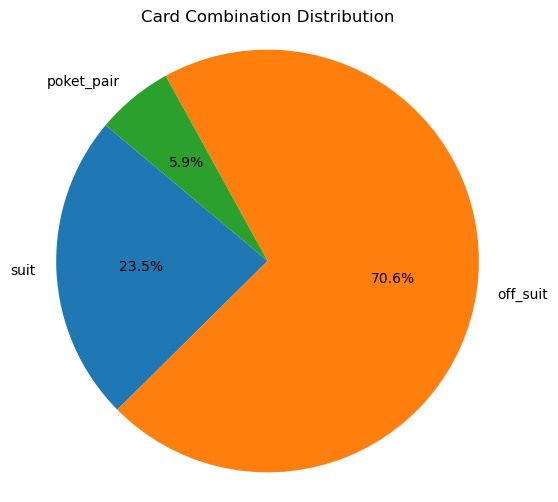

In [15]:
labels = ['suit', 'off_suit', 'poket_pair']
sizes = [suit_combo_count, off_suit_combo_count, notpair_hand]

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Card Combination Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

각 포켓페어, 수딧, 오프수딧을 받을 확률은 5.9%, 23.5%, 70.6%이다.

In [16]:
hg_df_showcard

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087
36,144,1,0,0,StephCurry,100.00,4c 4s,0,0,1,1,3,5d 7s 6c,Js,2c,5d 7s 6c Js 2c,1,132,0.253087
48,184,3,0,0,StephCurry,110.85,8s 6s,1,0,1,0,0,5h Jh 7c,3h,10s,5h Jh 7c 3h 10s,1,132,0.253087
216,39366,1,0,0,StephCurry,214.15,Qs Qh,1,0,2,0,0,3s Qc 7c,9d,As,3s Qc 7c 9d As,1,132,0.253087
242,39422,1,0,0,StephCurry,212.76,As Qd,1,0,1,1,0,9d 8s 10d,10s,2d,9d 8s 10d 10s 2d,0,132,0.253087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306265,51956,2,0,0,mabext99,23.30,5c 3c,0,0,0,5,1,5s 10c 10d,8d,2h,5s 10c 10d 8d 2h,0,1,0.001917
306270,51973,2,0,0,mabext99,7.48,4h 4c,0,0,0,1,0,Qd 9h 9s,Ks,Ac,Qd 9h 9s Ks Ac,0,1,0.001917
306276,51973,5,0,1,gsxrmike,14.20,5s 5d,2,0,1,0,0,Qd 9h 9s,Ks,Ac,Qd 9h 9s Ks Ac,0,0,0.000000
306311,52125,4,0,0,superman51210,43.17,Ks Ac,1,0,0,2,2,Qs Jc As,2c,6s,Qs Jc As 2c 6s,1,6,0.011504


In [17]:
hg_df_showcard['PlayerCard']

1         Ad 10d
36         4c 4s
48         8s 6s
216        Qs Qh
242        As Qd
           ...  
306265     5c 3c
306270     4h 4c
306276     5s 5d
306311     Ks Ac
306320     6d 5d
Name: PlayerCard, Length: 61613, dtype: object

In [18]:
def compare(num1, num2, suit1, suit2):
    if num1 == 'A':
        num1_int = 14
       
    elif num1 == 'K':
        num1_int = 13
        
    elif num1 == 'Q':
        num1_int = 12
        
    elif num1 == 'J':
        num1_int = 11
    else:
        num1_int = int(num1)
    #print(num1_int, type(num1_int))
    if num2 == 'A':
        num2_int = 14
       
    elif num2 == 'K':
        num2_int = 13
        
    elif num2 == 'Q':
        num2_int = 12
        
    elif num2 == 'J':
        num2_int = 11
    else:
        num2_int = int(num2)
    #print(num1_int, type(num1_int))

    if suit1 == suit2:
        suit = 's'
    elif suit1 != suit2:
        suit = 'o'

    
    if num1_int > num2_int:
        return num1+num2+suit
    elif num2_int > num1_int:
        return num2+num1+suit

In [19]:
def get_ranks(x):
    #print(x)
    len_x = x.split(' ')
    #print(len(len_x))
    card_order = ['A', 'K','Q','J','10','9','8','7','6','5','4','3','2']
    card1 = len_x[0]
    card2 = len_x[1]
    #print(card1, card2)

    num1 = card1[:-1]
    num2 = card2[:-1]

    suit1 = card1[-1]
    suit2 = card2[-1]

    #print(num1, num2)
    #print()
    #print(suit1, suit2)

    if num1 == num2:
        return num1+num2

    elif num1 != num2:
        result = compare(num1, num2,suit1, suit2)
        print(result)
        return result

In [20]:
hg_df_showcard['Hands'] = hg_df_showcard['PlayerCard'].apply(get_ranks)

A10s
86s
AQo
AKo
AKo
AKs
AKo
KQo
Q3o
A10s
J10s
QJs
AKo
109s
KQo
Q10s
K10o
AKo
65s
54s
AJo
AJs
84s
J10s
AQs
K9o
A6s
54s
KJs
A7s
A4s
A6s
86s
J7o
AQo
AKo
AJs
KQs
A8s
J6s
A8s
Q10s
72o
KQo
J10s
A2s
98o
AKo
AJs
AKs
97s
AJo
K10s
65s
65o
K9s
AKo
108s
AKo
A10s
A8o
J9s
A6o
Q10o
AQs
Q10o
103s
J10o
A7o
J7o
KJo
K8s
AJo
AKo
K6s
QJo
98s
108s
109s
J10o
K5s
98s
54s
Q10o
AKo
A10s
96s
92o
109s
J8o
A3s
AKo
J9s
92o
K10s
53s
106o
AKo
J10o
AQo
AQs
A9s
AJo
109o
J10s
QJs
Q9o
A8s
QJs
98s
J10s
A8s
K10s
A7o
A7s
98s
65o
AKo
KQo
A7s
KQo
87s
AJo
Q10o
AQs
KQo
97s
J3o
Q9o
54o
J10s
63o
109o
K7o
AKs
62o
63s
53o
93o
K7o
74s
65o
106s
75o
53o
KQs
K2o
96o
87s
97o
104s
86o
K3o
102o
Q3s
109o
74s
64o
J9s
K3o
AJo
AKo
92o
94o
96o
109o
72o
A6o
Q8o
A8o
QJo
A9s
95o
107s
83o
AJo
102s
J10o
43o
Q9o
A5o
K2o
86o
QJo
K9s
105o
J6s
32s
97o
A5o
76o
92o
97o
84o
A5o
Q2o
73o
A6o
103o
Q7o
Q8o
QJo
K8o
72s
Q7o
AKo
Q8s
42s
84s
94o
J7o
52o
104o
J3o
96o
Q4o
Q10o
J6o
AQs
A9o
32s
108o
K4o
J8o
Q5o
A4o
Q7o
52o
93o
Q6o
J9o
92s
Q3o
52o
93o
KJs
AKs
63o
A7o

C:\Users\kangh\AppData\Local\Temp\ipykernel_24480\3058798499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hg_df_showcard['Hands'] = hg_df_showcard['PlayerCard'].apply(get_ranks)


In [21]:
hg_df_showcard

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,Hands
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087,A10s
36,144,1,0,0,StephCurry,100.00,4c 4s,0,0,1,1,3,5d 7s 6c,Js,2c,5d 7s 6c Js 2c,1,132,0.253087,44
48,184,3,0,0,StephCurry,110.85,8s 6s,1,0,1,0,0,5h Jh 7c,3h,10s,5h Jh 7c 3h 10s,1,132,0.253087,86s
216,39366,1,0,0,StephCurry,214.15,Qs Qh,1,0,2,0,0,3s Qc 7c,9d,As,3s Qc 7c 9d As,1,132,0.253087,QQ
242,39422,1,0,0,StephCurry,212.76,As Qd,1,0,1,1,0,9d 8s 10d,10s,2d,9d 8s 10d 10s 2d,0,132,0.253087,AQo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306265,51956,2,0,0,mabext99,23.30,5c 3c,0,0,0,5,1,5s 10c 10d,8d,2h,5s 10c 10d 8d 2h,0,1,0.001917,53s
306270,51973,2,0,0,mabext99,7.48,4h 4c,0,0,0,1,0,Qd 9h 9s,Ks,Ac,Qd 9h 9s Ks Ac,0,1,0.001917,44
306276,51973,5,0,1,gsxrmike,14.20,5s 5d,2,0,1,0,0,Qd 9h 9s,Ks,Ac,Qd 9h 9s Ks Ac,0,0,0.000000,55
306311,52125,4,0,0,superman51210,43.17,Ks Ac,1,0,0,2,2,Qs Jc As,2c,6s,Qs Jc As 2c 6s,1,6,0.011504,AKo


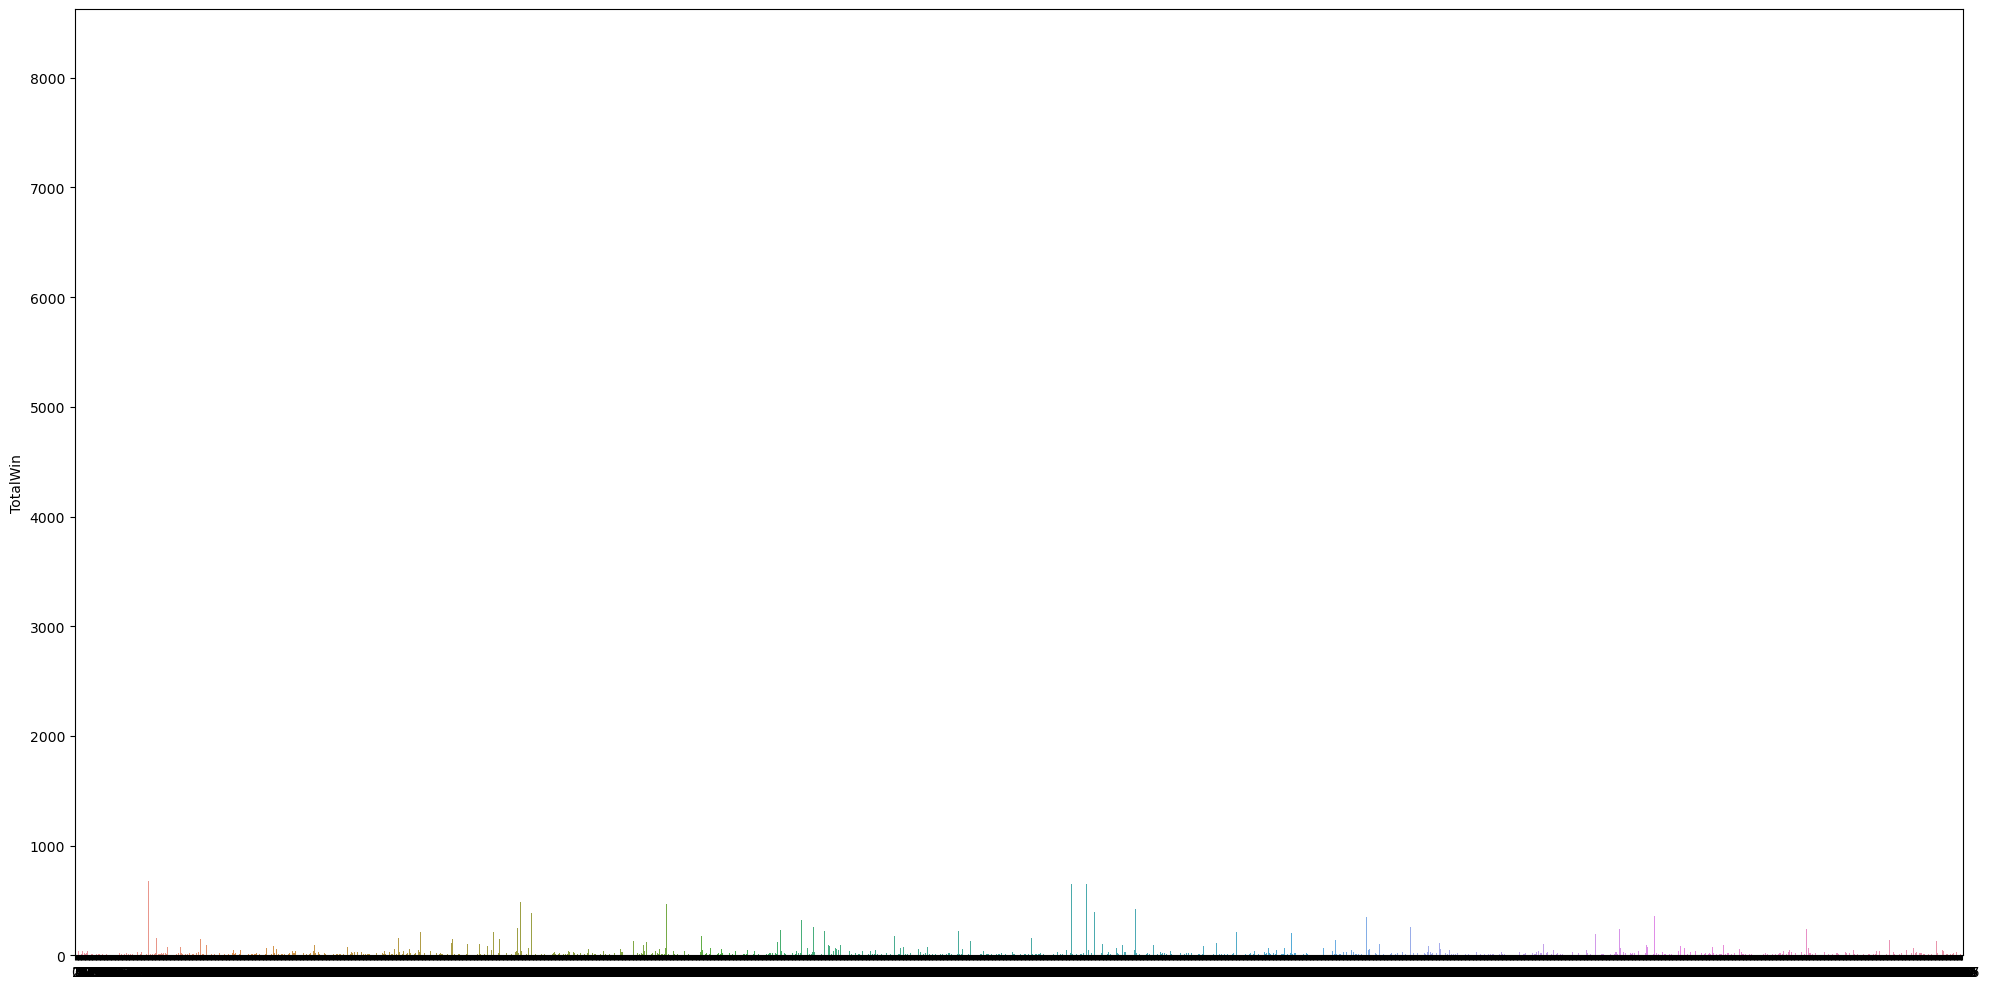

In [22]:
plt.figure(figsize=(20,10))
index = hg_df_player.index
sns.barplot(x=index, y='TotalWin', data=hg_df_player)
plt.tight_layout()
plt.show()

TotalWin이 많은 상위 20명의 데이터를 추출  
데이터를 보면, 패를 공개하지 않는 사람들이 대부분이고, 이긴 사람이 거의 패를 공개했기 때문에, 승률이 높은 상위 20명의 데이터를 추출

In [23]:
hg_df_player['Win Rate'].sort_values(ascending=False).head(20)

569     15.752742
93       1.290360
1285     1.253931
1266     1.252013
25       1.035355
1133     0.966332
566      0.924151
564      0.914564
751      0.901143
1347     0.812946
635      0.772682
1295     0.759261
580      0.734335
1096     0.717080
2006     0.682568
1640     0.665312
1754     0.640387
923      0.611627
762      0.577115
527      0.510008
Name: Win Rate, dtype: float64

In [24]:
hg_df_win = hg_df_showcard[hg_df_showcard['Win Rate'] > 0.51]
hg_df_win

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,Hands
2941,143,6,0,0,AironVega,100.00,9d Kd,1,0,2,0,1,Qs 9h 2h,7s,As,Qs 9h 2h 7s As,0,673,1.290360,K9s
2950,160,6,0,1,AironVega,102.78,9c 9d,1,0,1,0,0,7s Ks Ad,6h,6s,7s Ks Ad 6h 6s,0,673,1.290360,99
2955,172,6,0,0,AironVega,229.66,Ad Ks,1,0,3,1,0,4d 9d Qd,2h,8h,4d 9d Qd 2h 8h,0,673,1.290360,AKo
2979,212,6,0,0,AironVega,204.55,10d 8d,1,0,0,2,1,10h 5c Ks,2s,Kc,10h 5c Ks 2s Kc,1,673,1.290360,108s
3043,1084,3,0,0,AironVega,52.20,As Kh,1,0,1,1,0,3c Ac 6c,10h,Kc,3c Ac 6c 10h Kc,0,673,1.290360,AKo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230151,33558,1,0,0,IgLa,52.22,Jd 7d,1,0,0,1,2,Kh 2h Qc,Qs,7c,Kh 2h Qc Qs 7c,1,482,0.924151,J7s
230179,33612,5,0,1,IgLa,94.25,Ac 7c,1,0,2,1,2,4h 2h 7d,10d,3c,4h 2h 7d 10d 3c,1,482,0.924151,A7s
230188,33674,5,0,0,IgLa,50.00,6c 5c,1,0,1,2,0,2h 5d 7d,Ac,Qc,2h 5d 7d Ac Qc,1,482,0.924151,65s
230222,42931,4,0,0,IgLa,50.75,Qd Qc,1,0,0,0,0,Ad Jc 7h,5h,4d,Ad Jc 7h 5h 4d,0,482,0.924151,QQ


위 데이터는 패를 공개한 사람의 승률

아래의 데이터는 패의 순위와 사람수에따른 승률을 나타낸 것이다.  
2명의 게임과 5명의 게임 데이터는 차이가 많이 나기에 제거

In [25]:
hr_df = pd.read_csv('./datasets/Hand_Rank.csv')
hr_df

,Dealt,Hand Rank,10,9,8,6,5,2
0,AA,100.0%,31.0%,35.0%,39.0%,50.0%,56.0%,85.0%
1,KK,99.5%,26.0%,30.0%,33.0%,43.0%,50.0%,83.0%
2,QQ,99.0%,23.0%,25.0%,29.0%,38.0%,45.0%,80.0%
3,JJ,97.9%,20.0%,22.0%,25.0%,34.0%,41.0%,78.0%
4,1010,94.5%,18.0%,20.0%,22.0%,30.0%,37.0%,75.0%
5,AKs,99.0%,22.0%,24.0%,26.0%,32.0%,36.0%,68.0%
6,AQs,98.8%,20.0%,22.0%,25.0%,31.0%,35.0%,67.0%
7,AJs,97.7%,19.0%,21.0%,23.0%,29.0%,34.0%,66.0%
8,A10s,96.6%,19.0%,20.0%,23.0%,28.0%,33.0%,66.0%
9,KQs,98.0%,20.0%,22.0%,24.0%,30.0%,34.0%,64.0%


In [26]:
hr_df = hr_df.drop('2',axis=1)

In [27]:
hr_df = hr_df.drop('5',axis=1)

In [28]:
hr_df

,Dealt,Hand Rank,10,9,8,6
0,AA,100.0%,31.0%,35.0%,39.0%,50.0%
1,KK,99.5%,26.0%,30.0%,33.0%,43.0%
2,QQ,99.0%,23.0%,25.0%,29.0%,38.0%
3,JJ,97.9%,20.0%,22.0%,25.0%,34.0%
4,1010,94.5%,18.0%,20.0%,22.0%,30.0%
5,AKs,99.0%,22.0%,24.0%,26.0%,32.0%
6,AQs,98.8%,20.0%,22.0%,25.0%,31.0%
7,AJs,97.7%,19.0%,21.0%,23.0%,29.0%
8,A10s,96.6%,19.0%,20.0%,23.0%,28.0%
9,KQs,98.0%,20.0%,22.0%,24.0%,30.0%


In [29]:
hr_df['average_win'] = hr_df['10'] + hr_df['9'] + hr_df['8'] + hr_df['6']

In [30]:
hr_df = hr_df.drop('average_win', axis=1)
hr_df

,Dealt,Hand Rank,10,9,8,6
0,AA,100.0%,31.0%,35.0%,39.0%,50.0%
1,KK,99.5%,26.0%,30.0%,33.0%,43.0%
2,QQ,99.0%,23.0%,25.0%,29.0%,38.0%
3,JJ,97.9%,20.0%,22.0%,25.0%,34.0%
4,1010,94.5%,18.0%,20.0%,22.0%,30.0%
5,AKs,99.0%,22.0%,24.0%,26.0%,32.0%
6,AQs,98.8%,20.0%,22.0%,25.0%,31.0%
7,AJs,97.7%,19.0%,21.0%,23.0%,29.0%
8,A10s,96.6%,19.0%,20.0%,23.0%,28.0%
9,KQs,98.0%,20.0%,22.0%,24.0%,30.0%


In [31]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dealt      22 non-null     object
 1   Hand Rank  22 non-null     object
 2   10         22 non-null     object
 3   9          22 non-null     object
 4   8          22 non-null     object
 5   6          22 non-null     object
dtypes: object(6)
memory usage: 1.2+ KB


In [32]:
hr_df['10'] = hr_df['10'].str.replace('%', '')

In [33]:
hr_df['9'] = hr_df['9'].str.replace('%', '')
hr_df['8'] = hr_df['8'].str.replace('%', '')
hr_df['6'] = hr_df['6'].str.replace('%', '')
hr_df['10'] = hr_df['10'].astype(float)
hr_df['9'] = hr_df['9'].astype(float)
hr_df['8'] = hr_df['8'].astype(float)
hr_df['6'] = hr_df['6'].astype(float)
hr_df

,Dealt,Hand Rank,10,9,8,6
0,AA,100.0%,31.0,35.0,39.0,50.0
1,KK,99.5%,26.0,30.0,33.0,43.0
2,QQ,99.0%,23.0,25.0,29.0,38.0
3,JJ,97.9%,20.0,22.0,25.0,34.0
4,1010,94.5%,18.0,20.0,22.0,30.0
5,AKs,99.0%,22.0,24.0,26.0,32.0
6,AQs,98.8%,20.0,22.0,25.0,31.0
7,AJs,97.7%,19.0,21.0,23.0,29.0
8,A10s,96.6%,19.0,20.0,23.0,28.0
9,KQs,98.0%,20.0,22.0,24.0,30.0


In [34]:
hr_df['ave_win'] = hr_df['10'] + hr_df['9'] + hr_df['8'] + hr_df['6']

In [35]:
hr_df['ave_win'] = hr_df['ave_win'] / 4
hr_df

,Dealt,Hand Rank,10,9,8,6,ave_win
0,AA,100.0%,31.0,35.0,39.0,50.0,38.75
1,KK,99.5%,26.0,30.0,33.0,43.0,33.00
2,QQ,99.0%,23.0,25.0,29.0,38.0,28.75
3,JJ,97.9%,20.0,22.0,25.0,34.0,25.25
4,1010,94.5%,18.0,20.0,22.0,30.0,22.50
5,AKs,99.0%,22.0,24.0,26.0,32.0,26.00
6,AQs,98.8%,20.0,22.0,25.0,31.0,24.50
7,AJs,97.7%,19.0,21.0,23.0,29.0,23.00
8,A10s,96.6%,19.0,20.0,23.0,28.0,22.50
9,KQs,98.0%,20.0,22.0,24.0,30.0,24.00


평균 승률은 위와 같다. 9이하의 숫자의 경우 자료조사에 의하면 Fold하는 것을 권유한다.  
따라서 위 자료는 10, J, Q, K, A를 손패에 들었을 때의 이길 확률지표이다.  
그렇다면, 상위 패를 손에 쥐고 게임에서 이길 확률을 구해보자.

In [36]:
hr_df = hr_df.rename(columns={'Dealt' : 'Hands'})

In [37]:
hr_df = hr_df.drop(['10','9','8','6'], axis=1)

In [38]:
hr_df.head(10)

,Hands,Hand Rank,ave_win
0,AA,100.0%,38.75
1,KK,99.5%,33.00
2,QQ,99.0%,28.75
3,JJ,97.9%,25.25
4,1010,94.5%,22.50
5,AKs,99.0%,26.00
6,AQs,98.8%,24.50
7,AJs,97.7%,23.00
8,A10s,96.6%,22.50
9,KQs,98.0%,24.00


In [39]:
hr_df.tail(11)

,Hands,Hand Rank,ave_win
11,K10s,96.3%,21.75
12,QJs,96.9%,22.25
13,Q10s,94.9%,21.25
14,AKo,96.6%,22.50
15,AQo,94.5%,21.00
16,AJo,90.0%,20.00
17,A10o,85.6%,19.00
18,KQo,93.3%,20.00
19,KJo,88.3%,19.00
20,K10o,82.4%,18.25


In [40]:
hg_df_win

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,Hands
2941,143,6,0,0,AironVega,100.00,9d Kd,1,0,2,0,1,Qs 9h 2h,7s,As,Qs 9h 2h 7s As,0,673,1.290360,K9s
2950,160,6,0,1,AironVega,102.78,9c 9d,1,0,1,0,0,7s Ks Ad,6h,6s,7s Ks Ad 6h 6s,0,673,1.290360,99
2955,172,6,0,0,AironVega,229.66,Ad Ks,1,0,3,1,0,4d 9d Qd,2h,8h,4d 9d Qd 2h 8h,0,673,1.290360,AKo
2979,212,6,0,0,AironVega,204.55,10d 8d,1,0,0,2,1,10h 5c Ks,2s,Kc,10h 5c Ks 2s Kc,1,673,1.290360,108s
3043,1084,3,0,0,AironVega,52.20,As Kh,1,0,1,1,0,3c Ac 6c,10h,Kc,3c Ac 6c 10h Kc,0,673,1.290360,AKo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230151,33558,1,0,0,IgLa,52.22,Jd 7d,1,0,0,1,2,Kh 2h Qc,Qs,7c,Kh 2h Qc Qs 7c,1,482,0.924151,J7s
230179,33612,5,0,1,IgLa,94.25,Ac 7c,1,0,2,1,2,4h 2h 7d,10d,3c,4h 2h 7d 10d 3c,1,482,0.924151,A7s
230188,33674,5,0,0,IgLa,50.00,6c 5c,1,0,1,2,0,2h 5d 7d,Ac,Qc,2h 5d 7d Ac Qc,1,482,0.924151,65s
230222,42931,4,0,0,IgLa,50.75,Qd Qc,1,0,0,0,0,Ad Jc 7h,5h,4d,Ad Jc 7h 5h 4d,0,482,0.924151,QQ


위 데이터와 합친다.

In [41]:
hg_df_win

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,Hands
2941,143,6,0,0,AironVega,100.00,9d Kd,1,0,2,0,1,Qs 9h 2h,7s,As,Qs 9h 2h 7s As,0,673,1.290360,K9s
2950,160,6,0,1,AironVega,102.78,9c 9d,1,0,1,0,0,7s Ks Ad,6h,6s,7s Ks Ad 6h 6s,0,673,1.290360,99
2955,172,6,0,0,AironVega,229.66,Ad Ks,1,0,3,1,0,4d 9d Qd,2h,8h,4d 9d Qd 2h 8h,0,673,1.290360,AKo
2979,212,6,0,0,AironVega,204.55,10d 8d,1,0,0,2,1,10h 5c Ks,2s,Kc,10h 5c Ks 2s Kc,1,673,1.290360,108s
3043,1084,3,0,0,AironVega,52.20,As Kh,1,0,1,1,0,3c Ac 6c,10h,Kc,3c Ac 6c 10h Kc,0,673,1.290360,AKo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230151,33558,1,0,0,IgLa,52.22,Jd 7d,1,0,0,1,2,Kh 2h Qc,Qs,7c,Kh 2h Qc Qs 7c,1,482,0.924151,J7s
230179,33612,5,0,1,IgLa,94.25,Ac 7c,1,0,2,1,2,4h 2h 7d,10d,3c,4h 2h 7d 10d 3c,1,482,0.924151,A7s
230188,33674,5,0,0,IgLa,50.00,6c 5c,1,0,1,2,0,2h 5d 7d,Ac,Qc,2h 5d 7d Ac Qc,1,482,0.924151,65s
230222,42931,4,0,0,IgLa,50.75,Qd Qc,1,0,0,0,0,Ad Jc 7h,5h,4d,Ad Jc 7h 5h 4d,0,482,0.924151,QQ


In [42]:
print(hg_df_win.Hands.info())
print(hr_df.Hands.info())

<class 'pandas.core.series.Series'>
Index: 53483 entries, 2941 to 230300
Series name: Hands
Non-Null Count  Dtype 
--------------  ----- 
53483 non-null  object
dtypes: object(1)
memory usage: 835.7+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 22 entries, 0 to 21
Series name: Hands
Non-Null Count  Dtype 
--------------  ----- 
22 non-null     object
dtypes: object(1)
memory usage: 308.0+ bytes
None


In [43]:
hg_df_win['Hands']= hg_df_win['Hands'].astype(str)
hr_df['Hands'] = hr_df['Hands'].astype(str)


C:\Users\kangh\AppData\Local\Temp\ipykernel_24480\200569745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hg_df_win['Hands']= hg_df_win['Hands'].astype(str)


In [44]:
hg_df_win_merged = hg_df_win.merge(hr_df, on='Hands')
hg_df_win_merged

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,...,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,Hands,Hand Rank,ave_win
0,172,6,0,0,AironVega,229.66,Ad Ks,1,0,3,...,4d 9d Qd,2h,8h,4d 9d Qd 2h 8h,0,673,1.290360,AKo,96.6%,22.5
1,1084,3,0,0,AironVega,52.20,As Kh,1,0,1,...,3c Ac 6c,10h,Kc,3c Ac 6c 10h Kc,0,673,1.290360,AKo,96.6%,22.5
2,33972,6,0,1,AironVega,55.50,Kh Ad,1,0,1,...,Qs 3s Ks,7d,3h,Qs 3s Ks 7d 3h,1,673,1.290360,AKo,96.6%,22.5
3,40379,4,0,0,AironVega,200.00,Kd Ac,1,0,1,...,4d 9h 6s,2s,8d,4d 9h 6s 2s 8d,0,673,1.290360,AKo,96.6%,22.5
4,41972,6,0,1,AironVega,124.50,As Kc,1,0,2,...,3s 5d 10d,4c,9d,3s 5d 10d 4c 9d,0,673,1.290360,AKo,96.6%,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7159,34414,2,0,0,imperceptible,27.73,Jc Ac,1,0,1,...,8c 6s 7c,Jh,3c,8c 6s 7c Jh 3c,1,334,0.640387,AJs,97.7%,23.0
7160,18333,2,0,0,odel_nadel,34.69,Ac Jc,1,0,3,...,7h Ah Jh,Jd,As,7h Ah Jh Jd As,1,356,0.682568,AJs,97.7%,23.0
7161,25266,5,0,0,WomboComboAA,58.27,Js As,1,0,1,...,3d 9c 9s,7c,4c,3d 9c 9s 7c 4c,1,396,0.759261,AJs,97.7%,23.0
7162,4769,1,0,0,Indigol,76.69,Jh Ah,1,0,1,...,7s 4h 3d,Js,7d,7s 4h 3d Js 7d,1,383,0.734335,AJs,97.7%,23.0


In [45]:
hg_df_win.Hands.isna().sum()

0

상위 패를 가진 사람들의 총 수 = 7164

In [46]:
high_hand_win = hg_df_win_merged.Win.sum()
high_hand_win

4014

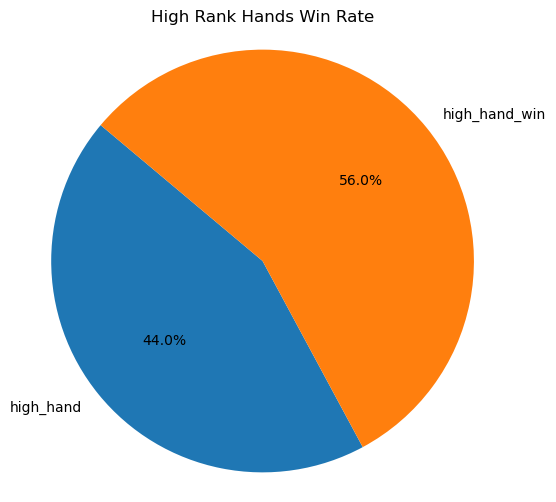

In [47]:
high_hand = 7164

labels = ['high_hand', 'high_hand_win']
sizes = [high_hand - high_hand_win, high_hand_win]

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('High Rank Hands Win Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

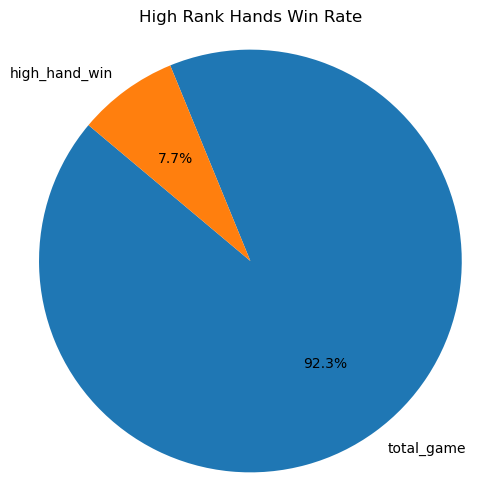

In [48]:

total = 52156
labels = ['total_game', 'high_hand_win']
sizes = [total - high_hand_win, high_hand_win]

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('High Rank Hands Win Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [49]:
hg_df_win

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,Hands
2941,143,6,0,0,AironVega,100.00,9d Kd,1,0,2,0,1,Qs 9h 2h,7s,As,Qs 9h 2h 7s As,0,673,1.290360,K9s
2950,160,6,0,1,AironVega,102.78,9c 9d,1,0,1,0,0,7s Ks Ad,6h,6s,7s Ks Ad 6h 6s,0,673,1.290360,99
2955,172,6,0,0,AironVega,229.66,Ad Ks,1,0,3,1,0,4d 9d Qd,2h,8h,4d 9d Qd 2h 8h,0,673,1.290360,AKo
2979,212,6,0,0,AironVega,204.55,10d 8d,1,0,0,2,1,10h 5c Ks,2s,Kc,10h 5c Ks 2s Kc,1,673,1.290360,108s
3043,1084,3,0,0,AironVega,52.20,As Kh,1,0,1,1,0,3c Ac 6c,10h,Kc,3c Ac 6c 10h Kc,0,673,1.290360,AKo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230151,33558,1,0,0,IgLa,52.22,Jd 7d,1,0,0,1,2,Kh 2h Qc,Qs,7c,Kh 2h Qc Qs 7c,1,482,0.924151,J7s
230179,33612,5,0,1,IgLa,94.25,Ac 7c,1,0,2,1,2,4h 2h 7d,10d,3c,4h 2h 7d 10d 3c,1,482,0.924151,A7s
230188,33674,5,0,0,IgLa,50.00,6c 5c,1,0,1,2,0,2h 5d 7d,Ac,Qc,2h 5d 7d Ac Qc,1,482,0.924151,65s
230222,42931,4,0,0,IgLa,50.75,Qd Qc,1,0,0,0,0,Ad Jc 7h,5h,4d,Ad Jc 7h 5h 4d,0,482,0.924151,QQ


In [50]:
hg_df_win.Win.sum()

9182

2. Action 중에 Bet과 Raise를 많이 할 수록 많이 이기는가?

In [51]:
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52123,5,0,1,GiveMeHeads,51.05,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669
306332,52124,5,0,0,GiveMeHeads,51.55,NaN,2,0,0,1,0,5h 2c 6c,NaN,NaN,5h 2c 6c,1,4,0.007669
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669
306334,52134,5,0,1,GiveMeHeads,57.38,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669


In [52]:
hg_df.loc[:,'bet+raise'] = hg_df['raise'].astype(int) + hg_df['bets'].astype(int)
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,bet+raise
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087,1
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087,0
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52123,5,0,1,GiveMeHeads,51.05,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2
306332,52124,5,0,0,GiveMeHeads,51.55,NaN,2,0,0,1,0,5h 2c 6c,NaN,NaN,5h 2c 6c,1,4,0.007669,2
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669,1
306334,52134,5,0,1,GiveMeHeads,57.38,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2


In [53]:
hg_df2 = hg_df[['GameNo','PlayerName','bets','raise','TotalWin','bet+raise']]
hg_df2

,GameNo,PlayerName,bets,raise,TotalWin,bet+raise
0,0,StephCurry,0,0,132,0
1,1,StephCurry,1,0,132,1
2,2,StephCurry,0,0,132,0
3,5,StephCurry,0,0,132,0
4,9,StephCurry,0,0,132,0
...,...,...,...,...,...,...
306331,52123,GiveMeHeads,1,1,4,2
306332,52124,GiveMeHeads,0,2,4,2
306333,52129,GiveMeHeads,1,0,4,1
306334,52134,GiveMeHeads,1,1,4,2


In [54]:
hg_df2 = hg_df2.groupby('PlayerName').sum().reset_index()

In [55]:
hg_df2

,PlayerName,GameNo,bets,raise,TotalWin,bet+raise
0,!MushroomMan!,397069,28,8,708,36
1,....,4253214,32,9,1176,41
2,00MOD,323789,4,4,30,8
3,01001111,1087193,8,1,69,9
4,0nlyDaNuts,10081936,77,34,9240,111
...,...,...,...,...,...,...
2393,zimsaw55,134683,4,2,6,6
2394,zionnoiz,1912983,93,42,6624,135
2395,zitkojosh,1279008,19,12,736,31
2396,zqzqzq,85161,0,0,0,0


In [56]:
correlation = hg_df2['TotalWin'].corr(hg_df2['bet+raise'])
print(correlation)

0.9682089949551498


In [57]:
cor1 = hg_df2['TotalWin'].corr(hg_df2['bets'])
cor1

0.9714173414628031

In [58]:
cor2 = hg_df2['TotalWin'].corr(hg_df2['raise'])
cor2

0.957666794258503

bet과 raise의 각각 상관관계를 확인한 결과 1에 매우 가까운 양의 상관관계를 나타냄을 알 수 있었다.  
이를 그래프로 확인한 결과 다음과 같았다.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

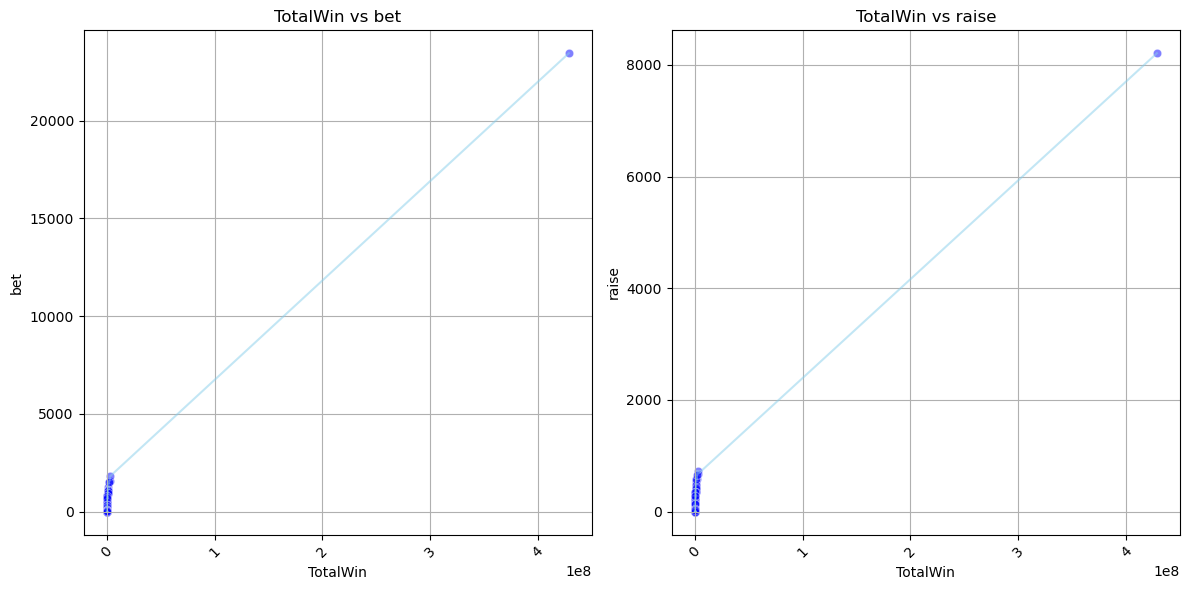

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열의 서브플롯 생성

# 첫 번째 서브플롯 (TotalWin vs bet)
sns.scatterplot(x=hg_df2['TotalWin'], y=hg_df2['bets'], color='blue', alpha=0.5, ax=axes[0])
sns.lineplot(x=hg_df2['TotalWin'], y=hg_df2['bets'], color='skyblue', alpha=0.5, ax=axes[0])
axes[0].set_title('TotalWin vs bet')
axes[0].set_xlabel('TotalWin')
axes[0].set_ylabel('bet')
axes[0].tick_params(axis='x', rotation=45)  # x축 눈금 라벨 회전
axes[0].grid(True)

# 두 번째 서브플롯 (TotalWin vs raise)
sns.scatterplot(x=hg_df2['TotalWin'], y=hg_df2['raise'], color='blue', alpha=0.5, ax=axes[1])
sns.lineplot(x=hg_df2['TotalWin'], y=hg_df2['raise'], color='skyblue', alpha=0.5, ax=axes[1])
axes[1].set_title('TotalWin vs raise')
axes[1].set_xlabel('TotalWin')
axes[1].set_ylabel('raise')
axes[1].tick_params(axis='x', rotation=45)  # x축 눈금 라벨 회전
axes[1].grid(True)

plt.tight_layout()  # 서브플롯 간 간격 최적화
plt.show()


Bets와 Raise 수에 따른 승리  
> Bet과 Raise와 Total Win  
> Bet과 Raise를 많이 할 수록, 게임에서 많이 이기는 것을 확인할 수 있었다.

3. SeedMoney와 Total Win

In [60]:
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,bet+raise
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087,1
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087,0
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52123,5,0,1,GiveMeHeads,51.05,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2
306332,52124,5,0,0,GiveMeHeads,51.55,NaN,2,0,0,1,0,5h 2c 6c,NaN,NaN,5h 2c 6c,1,4,0.007669,2
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669,1
306334,52134,5,0,1,GiveMeHeads,57.38,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2


In [61]:
hg_df3 = hg_df.groupby('PlayerName')[['GameNo','SeedMoney','TotalWin']].min().reset_index()

In [62]:
hg_df3

,PlayerName,GameNo,SeedMoney,TotalWin
0,!MushroomMan!,6264,23.89,12
1,....,50477,59.22,14
2,00MOD,32356,14.64,3
3,01001111,47179,80.13,3
4,0nlyDaNuts,2472,28.51,35
...,...,...,...,...
2393,zimsaw55,22418,47.50,1
2394,zionnoiz,4465,6.66,48
2395,zitkojosh,27639,17.91,16
2396,zqzqzq,42579,56.65,0


In [63]:
hg_df3 = hg_df3.drop('GameNo', axis=1)
hg_df3

,PlayerName,SeedMoney,TotalWin
0,!MushroomMan!,23.89,12
1,....,59.22,14
2,00MOD,14.64,3
3,01001111,80.13,3
4,0nlyDaNuts,28.51,35
...,...,...,...
2393,zimsaw55,47.50,1
2394,zionnoiz,6.66,48
2395,zitkojosh,17.91,16
2396,zqzqzq,56.65,0


In [64]:
cor3 = hg_df3['TotalWin'].corr(hg_df3['SeedMoney'])
cor3

-0.028605140883582323

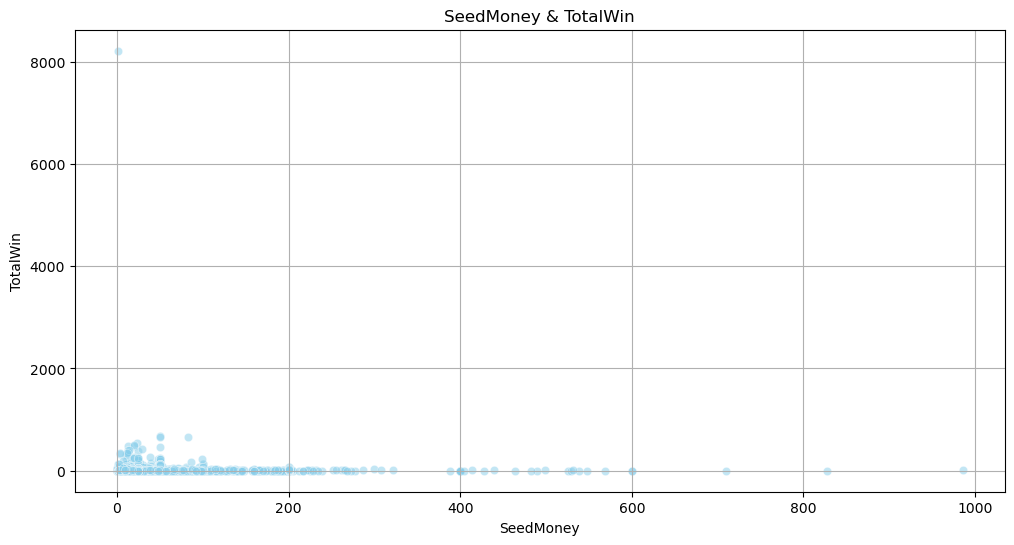

In [65]:
plt.figure(figsize=(12,6))

sns.scatterplot(y=hg_df3['TotalWin'], x=hg_df3['SeedMoney'], color='skyblue', alpha=0.5)
plt.title('SeedMoney & TotalWin')
plt.xlabel('SeedMoney')
plt.ylabel('TotalWin')
plt.grid(True)
plt.show()

In [66]:
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,bet+raise
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087,1
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087,0
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52123,5,0,1,GiveMeHeads,51.05,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2
306332,52124,5,0,0,GiveMeHeads,51.55,NaN,2,0,0,1,0,5h 2c 6c,NaN,NaN,5h 2c 6c,1,4,0.007669,2
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669,1
306334,52134,5,0,1,GiveMeHeads,57.38,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2


In [67]:
hg_df4 = hg_df.groupby('PlayerName').agg({'SmallBlind':'sum', 'TotalWin' : 'min'}).reset_index()
hg_df4

,PlayerName,SmallBlind,TotalWin
0,!MushroomMan!,10,12
1,....,12,14
2,00MOD,1,3
3,01001111,2,3
4,0nlyDaNuts,32,35
...,...,...,...
2393,zimsaw55,1,1
2394,zionnoiz,23,48
2395,zitkojosh,6,16
2396,zqzqzq,0,0


In [68]:
cor4 = hg_df4['TotalWin'].corr(hg_df4['SmallBlind'])
cor4

0.9984631715490778

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


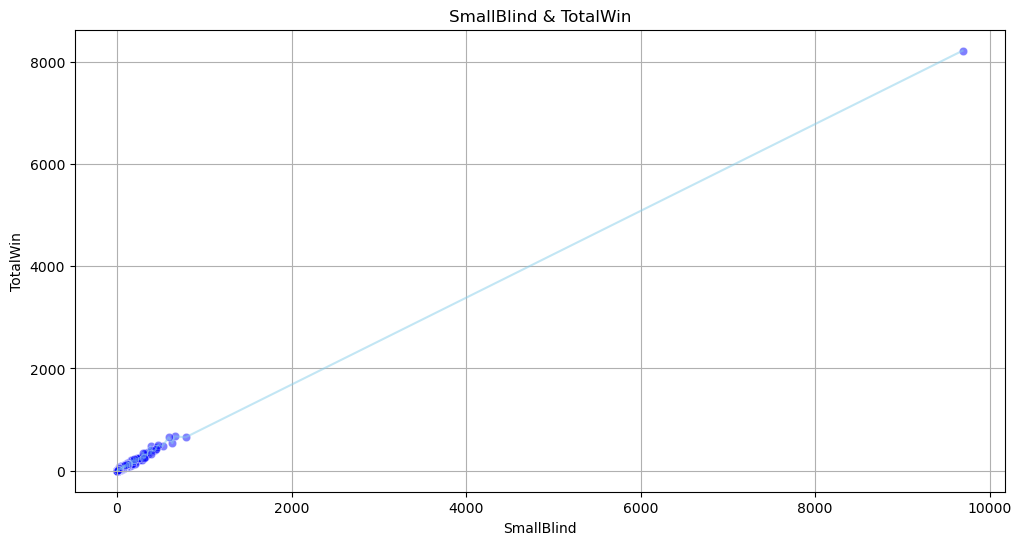

In [69]:
plt.figure(figsize=(12,6))

sns.scatterplot(y=hg_df4['TotalWin'], x=hg_df4['SmallBlind'], color='blue', alpha=0.5)
sns.lineplot(y=hg_df4['TotalWin'], x=hg_df4['SmallBlind'], color='skyblue', alpha=0.5)
plt.title('SmallBlind & TotalWin')
plt.xlabel('SmallBlind')
plt.ylabel('TotalWin')
plt.grid(True)
plt.show()

Lose일 때 Bet과 Raise의 관계

In [70]:
hg_df

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,bet+raise
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
1,1,1,0,0,StephCurry,105.78,Ad 10d,0,0,1,3,1,6d 5d 6s,7s,7c,6d 5d 6s 7s 7c,1,132,0.253087,1
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087,0
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306331,52123,5,0,1,GiveMeHeads,51.05,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2
306332,52124,5,0,0,GiveMeHeads,51.55,NaN,2,0,0,1,0,5h 2c 6c,NaN,NaN,5h 2c 6c,1,4,0.007669,2
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669,1
306334,52134,5,0,1,GiveMeHeads,57.38,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,1,4,0.007669,2


In [72]:
hg_df_lose = hg_df[hg_df['Win'] == 0]
hg_df_lose

,GameNo,SeatNo,Button,SmallBlind,PlayerName,SeedMoney,PlayerCard,raise,fold,bets,call,check,FLOP,TURN,RIVER,Board,Win,TotalWin,Win Rate,bet+raise
0,0,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
2,2,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
3,5,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,Ah Js 2s,NaN,NaN,Ah Js 2s,0,132,0.253087,0
4,9,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
5,11,1,0,0,StephCurry,105.78,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,132,0.253087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306327,52155,1,0,0,superman51210,43.77,NaN,0,1,0,0,0,Jc 10h 6c,Qd,NaN,Jc 10h 6c Qd,0,6,0.011504,0
306328,52116,5,0,0,GiveMeHeads,50.80,NaN,0,1,0,0,0,Qc 3c Qh,NaN,NaN,Qc 3c Qh,0,4,0.007669,0
306329,52119,5,0,0,GiveMeHeads,50.80,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,4,0.007669,0
306333,52129,5,0,0,GiveMeHeads,57.88,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,0.007669,1


In [83]:
hg_df_lose_player = hg_df_lose.groupby('PlayerName').agg({'raise':'sum', 'bets' : 'sum', 'Win':'count'}).reset_index()
hg_df_lose_player = hg_df_lose_player.rename(columns={'Win' : 'Lose'})
hg_df_lose_player

,PlayerName,raise,bets,Lose
0,!MushroomMan!,0,16,47
1,....,1,22,70
2,00MOD,2,1,7
3,01001111,0,5,20
4,0nlyDaNuts,9,52,229
...,...,...,...,...
2378,zimsaw55,1,1,5
2379,zionnoiz,13,47,90
2380,zitkojosh,2,7,30
2381,zqzqzq,0,0,2


In [84]:
cor5 = hg_df_lose_player['Lose'].corr(hg_df_lose_player['raise'])
cor5

0.9971155332341406

In [85]:
cor5 = hg_df_lose_player['Lose'].corr(hg_df_lose_player['bets'])
cor5

0.9993462813983557

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


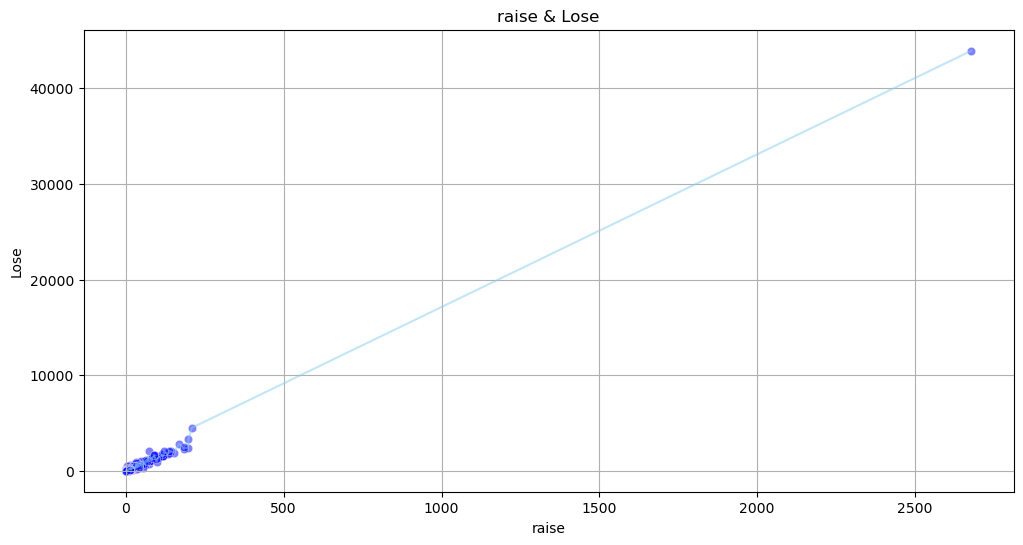

In [86]:
plt.figure(figsize=(12,6))

sns.scatterplot(y=hg_df_lose_player['Lose'], x=hg_df_lose_player['raise'], color='blue', alpha=0.5)
sns.lineplot(y=hg_df_lose_player['Lose'], x=hg_df_lose_player['raise'], color='skyblue', alpha=0.5)
plt.title('raise & Lose')
plt.xlabel('raise')
plt.ylabel('Lose')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


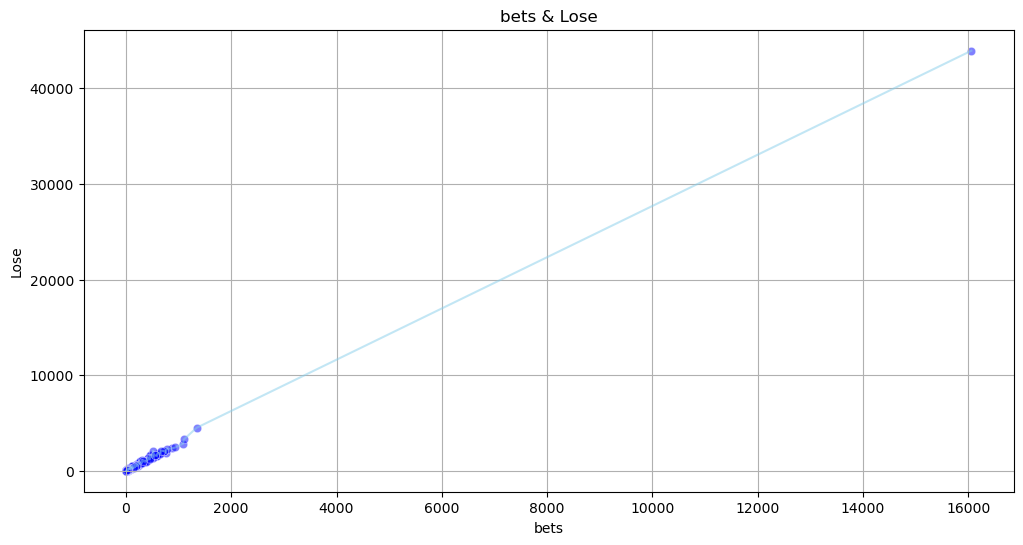

In [87]:
plt.figure(figsize=(12,6))

sns.scatterplot(y=hg_df_lose_player['Lose'], x=hg_df_lose_player['bets'], color='blue', alpha=0.5)
sns.lineplot(y=hg_df_lose_player['Lose'], x=hg_df_lose_player['bets'], color='skyblue', alpha=0.5)
plt.title('bets & Lose')
plt.xlabel('bets')
plt.ylabel('Lose')
plt.grid(True)
plt.show()

-------------------

## 👉종합 분석 결과

위 데이터를 분석한 방향은 아래와 같다.

1. Pre-Flop단계에서 2장의 패와 승률
2. Player의 Action과 승률
3. Player의 SeedMoney와 승률
4. Player의 위치(SmallBlind)에 따른 승률

### 👉Pre-Flop단계에서 2장의 패와 승률

전체 게임 데이터 중, 패를 공개한 플레이어만 따로 추출한 다음 그 승률을 구하였다.  

아래의 그림은 게임플레이의 데이터가 아닌 상위 13프로의 패일때, 그 승률을 나타낸 데이터이다.

<img src='./images/1.png'><img src='./images/2.png'>

홀덤 전문가들의 의견에 따르면, 9 이하의 패를 받았을 경우에는 Fold하고 게임에 참여하지 않는 것을 권유한다고 한다.  
이에 따라, 상위 13프로의 패를 받았을 때의 승률을 구한 결과 다음과 같았다.

<img src='./images/3.png'>

상위 13%의 패를 받을 확률 : 
> AA,KK,QQ,JJ,1010 = 5*6 =30  
> AKs, AKo = 16  
> 페어가 아닌 상위 패의 총 수 = 16 * 12 = 192  
> 상위 13%를 가질 확률 : 222 / 1326 = 16.74%  

이로 보아, 상위 패를 쥐고 게임에서 이길 확률이 절반을 겨우 넘는 것을 알 수 있었다.  
전체적인 확률은 게임에서 이길 확률이 56%이기에 총 확률은 9.374%이다.  


위 데이터를 토대로 실제 게임데이터에서 상위패를 가지고 이긴 플레이어를 확인한 결과는 다음과 같았다.

- 전체 게임수 대비 패를 공개한 사람 : 306336 / 53483 : 17.46%
- 패를 공개한 사람 수 중에서 게임에서 이긴 사람 : 53483 / 9182 : 17.16%
- 그 중 상위 패를 가진 사람 : 9182 / 4014 : 43.72%
- 전체 게임수에서 상위패를 가지고 이긴 사람 : 52156 / 4014 : 7.69%

<img src='./images/4.png'>

앞선 상위패를 가지고 게임에서 이길 확률이 9.374%였으나, 실제 게임데이터를 통해 구한 확률과 차이가 나는 것을 알 수 있었다.  
이로보아, 단순 상위패를 가졌다고 게임을 이긴다고 단정짓기는 어렵다고 볼 수 있다.

### 👉Player의 Action과 TotalWin

앞선 설명에서 Player의 Action에는 Bet, Raise, Fold, Call, Check, All-in등이 있다고 하였다.   
실제 게임데이터에는 All-in에 관한 데이터가 없기에 이를 베제하였다.  
이중 실제 게임에 영향을 미치는 Action에는 Bet과 Raise(칩을 거는 행동)이 있고,    
Bet과 Raise와 총 승리(TotalWin)와의 연관성을 확인하였다.

<img src='./images/5.png' width='400'>
<img src='./images/6.png' width='400'>

Bet과 TotalWin간의 상관관계지수를 확인한 결과 약 0.97로 매우 1에 근접한 양의 상관관계가 나타남을 알 수 있었다.   
Raise와 TotalWin간의 상관관계지수를 확인한 결과 약 0.96으로 마찬가지로 매우 1에 근접한 상관관계가 나타남을 알 수 있었다.  

이를 그래프로 확인한 결과는 다음과 같았다.

<img src='./images/7.png'>

이로 보아, Bet과 Raise를 많이 할수록 게임에서 이긴 회수가 많다라는 것을 확인할 수 있었다.

### 👉Player의 Action과 TotalLose

홀덤은 혼자서 하는 게임이 아니라 여럿이서 하는 게임이기 때문에, 위에서 언급한 것처럼 단순히 Bet과 Raise만 많이 한다고 이기는 게임은 아니다.  
따라서 이번엔 반대로, Bet과 Raise와 Player의 Lose간의 연관성을 알아보았다.

<img src='./images/12.png' width='400'>

Bet과 TotalLose, Raise와 TotalLose의 상관관계 지수를 확인한 결과, 매우 1에 근접한 양의 상관관계임을 알 수 있었다.
이를 그래프로 확인한 결과 아래와 같았다.

<img src='./images/14.png' width='500'> <img src='./images/13.png' width='500'>

### 👉Player의 SeedMoney와 TotalWin

플레이어의 SeedMoney와 TotalWin간의 연관성을 확인해보았다.  
상관관계 점수를 확인한 결과 다음과 같았다.

<img src='./images/8.png' width='400'>

상관관계 지수를 구한결과, -0.028로 0에 가까운 음의 상관관계 지수가 나타났다.  
이는 SeedMoney와 TotalWin간의 연관성이 거의 없다고 볼 수 있다.  

<img src='./images/9.png'>

실제 그래프로 확인한 결과 TotalWin과 SeedMoney간 연관성이 거의 없는 것을 확인할 수 있었다.

### 👉Player의 위치(SmallBlind)에 따른 승률

- 자리에 따른 승률이 얼마나 연관성이 있는가 싶지만 실제 홀덤에서는 SB의 자리가 실질적으로 게임에 매우 큰 영향을 미치는 자리이다.
- 게임에 참여유무에 상관없이 무조건적인 베팅의 강제성과 더불어 Pre-Flop(패 두장을 받는 단계) 단계를 제외한 나머지 자리에서  
  무조건 첫 베팅의 시작이기 때문에,
  SB의 첫 Action에 따라 나머지 플레이어들의 행동이 영향을 받을 수 밖에 없다.
- 물론 UTG(Under The Gun)이라는 BB(Big Blind)의 바로 옆자리도 Pre-Flop에서 첫 베팅을 실시하는 자리이기에 영향력이 크지만,  
  SB만큼 크지는 않기 때문에 위 데이터에도 UTG의 자리는 표기되지 않았다.
- 따라서, 위와 같은 이유로 SB의 자리가 TotalWin과 얼마나 연관성이 있는지 확인해보았다.

상관관계지수를 확인한 결과 다음과 같았다.

<img src='./images/10.png' width='400'>

확인한 결과 0.99라는 가장 1에 근접한 양의 상관관계라는 것을 알 수 있었다.

<img src='./images/11.png'>

그래프를 통해 확인한 결과 SmallBlind의 위치일때 게임에서 많이 승리한 것을 알 수 있었다.

-------------------

## 👉결론

실제 홀덤 게임데이터와, 상위 포켓의 데이터를 같이 분석한 결과,    
좋은 패일 수록 많이 이길 것이라고 생각했지만 실제 데이터 결과로는 그렇지 못한 승률임을 알 수 있었다.  
또한 플레이어의 시드머니와의 연관성도 없었다.  
플레이어가 SB일 때, 게임에서 많이 이긴 것을 알 수 있었다.  
플레이어의 Action중 Raise, Bet이 많을 수록 게임에서 많이 이겼다고 생각했으나,   
Lose와의 상관관계를 확인하고 그래프로 시각화한 결과 Raise와 Bet이 많은 만큼 많이 진 것 또한 알 수 있었다. 
  
따라서 다음과 같은 결론을 내릴 수 있었다.
  
홀덤은 순전히 수학적인 계산만으로는 이기기 어려운 게임이다.  
플레이어의 심리적인 요인과 의사 결정이 매우 중요한 역할을 한다.  
좋은 패를 가졌다고 해서 반드시 이기는 것은 아니며, 패를 공개하지 않고 게임을 하기에, 플레이어의 판단과 행동이 결과를 좌우하게 한다.  
이말인 즉슨, 위의 상위패를 들고 있지 않더라도, 블러핑(Bluffing)과 같은 전략으로 게임을 승리할 수 있다.  
즉, 자신의 자리와 상황을 잘 파악하고 상대방의 전략을 읽는 것이 승리에 중요한 역할을 하게된다.
  
결국, 홀덤에서 승리하기 위해서는 수학적 계산 뿐만 아니라 상대방의 행동을 읽고, 적절한 전략과 심리전을 펼쳐야 한다.  
이러한 요소들이 결합되어야만 승리할 수 있는 게임이라고 할 수 있다.
  
